<a href="https://colab.research.google.com/github/ENKI0311/UT-Austin_Coursework/blob/main/Project_5_Seed_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

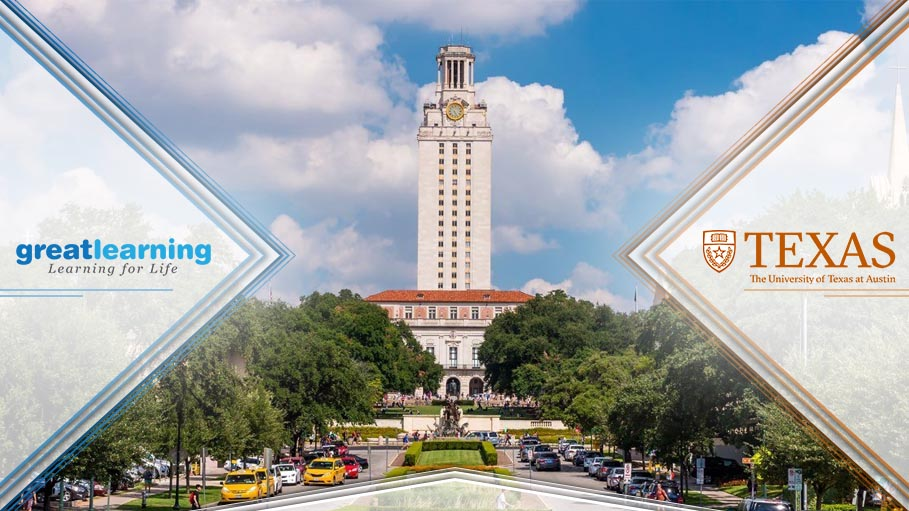

## By: John Chilton

# Problem Statement

## Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

# Install Libraries

In [ ]:
!pip install imagehash Pillow

####**Note: Please use GPU runtime to execute the code efficiently**

# Import Libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import Google Drive

In [ ]:
# Import drive from Google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load nessesary libraries

In [ ]:
# Load the labels.csv
df = pd.read_csv('/content/drive/MyDrive/lab_mount/Labels.csv')
# Load the images.npy
images = np.load('/content/drive/MyDrive/lab_mount/images.npy')

# Data Overview



 *   Observations
 *   Sanity Checks



In [ ]:
# Checking the head of the columns
df.head(10)

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


In [ ]:
# Checking the tail of the columns
df.tail(10)

,Label
4740,Loose Silky-bent
4741,Loose Silky-bent
4742,Loose Silky-bent
4743,Loose Silky-bent
4744,Loose Silky-bent
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent
4749,Loose Silky-bent


In [ ]:
# Shape of the data
df.shape

(4750, 1)

In [ ]:
# Converting to a list from a data frame
labels = df['Label'].tolist()

In [ ]:
# Print Images and number of Labels
print("Images shape:", images.shape)
print("Number of labels:", len(labels))

Images shape: (4750, 128, 128, 3)
Number of labels: 4750


In [ ]:
# Number of missing values
df.isnull().sum()

Label    0
dtype: int64

In [ ]:
# Describe all columns
df.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [ ]:
# Describe all columns in transpose
df.describe().T

,count,unique,top,freq
Label,4750,12,Loose Silky-bent,654


In [ ]:
# Checking for duplications
df.duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
4745     True
4746     True
4747     True
4748     True
4749     True
Length: 4750, dtype: bool

In [ ]:
# Checking the sum of duplications
df.duplicated().sum()

4738

In [ ]:
# Viwing the unique variables
df.nunique()

Label    12
dtype: int64

In [ ]:
# Visualizing the mean
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [ ]:
# Visuializing the median
df.median

<bound method NDFrame._add_numeric_operations.<locals>.median of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [ ]:
# Visualizing the mode
df.mode

<bound method DataFrame.mode of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [ ]:
# Visualizing the standard deviation
df.std

<bound method NDFrame._add_numeric_operations.<locals>.std of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [ ]:
# Data frame types
df.dtypes

Label    object
dtype: object

In [ ]:
# descriptive statistics of the object columns
df.describe(include=["object"]).T

,count,unique,top,freq
Label,4750,12,Loose Silky-bent,654


# Function Plots

In [ ]:
# Creating a function plot to use to plot the images

def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

In [ ]:
# Function plot #2 for viewing the images and arrays

def plot_images(images, labels):
    # 'images' is a list or array of image data and 'Labels' is a list or array of labels
    # Adjust the number of rows, columns, and figsize as needed
    n = len(images)
    rows = int(np.sqrt(n))
    cols = n // rows if n % rows == 0 else n // rows + 1

    plt.figure(figsize=(2 * cols, 2 * rows))
    for i in range(n):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exploratory Data Analysis

EDA is an important part of any project involving data.
It is important to investigate and understand the data better before building a model with it.
A few questions have been mentioned below which will help you understand the data better.
A thorough analysis of the data, in addition to the questions mentioned below, should be done.
How are these different category plant images different from each other?
Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
# Visualizing sample images and class distribution

# Visualizing sample images
plt.figure(figsize=(20, 20))
for i in range(25):  # Adjust the range for the number of images you want to display
    ax = plt.subplot(5, 5, i + 1)  # Adjust the grid size accordingly
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")

# Class distribution
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(20, 20))
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of images')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees

plt.show()

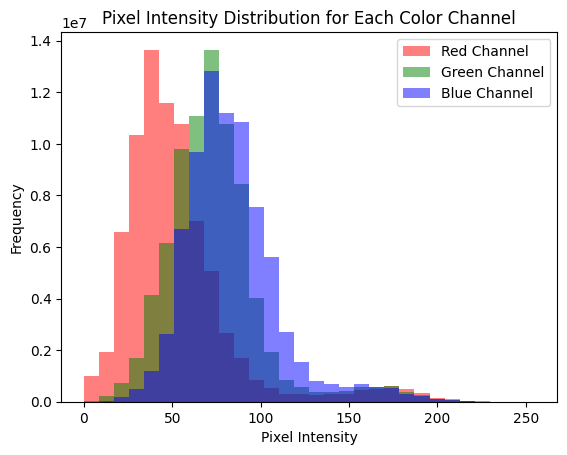

In [ ]:
# Pixal density dritribution

# List or array of your RGB images
if images[0].ndim == 3:
    # Extracting individual color channels
    red_values = np.concatenate([image[:,:,0].ravel() for image in images])
    green_values = np.concatenate([image[:,:,1].ravel() for image in images])
    blue_values = np.concatenate([image[:,:,2].ravel() for image in images])

    # Plotting the distribution for each color channel
    plt.hist(red_values, bins=30, range=[0,255], color='red', alpha=0.5, label='Red Channel')
    plt.hist(green_values, bins=30, range=[0,255], color='green', alpha=0.5, label='Green Channel')
    plt.hist(blue_values, bins=30, range=[0,255], color='blue', alpha=0.5, label='Blue Channel')

    plt.title("Pixel Intensity Distribution for Each Color Channel")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

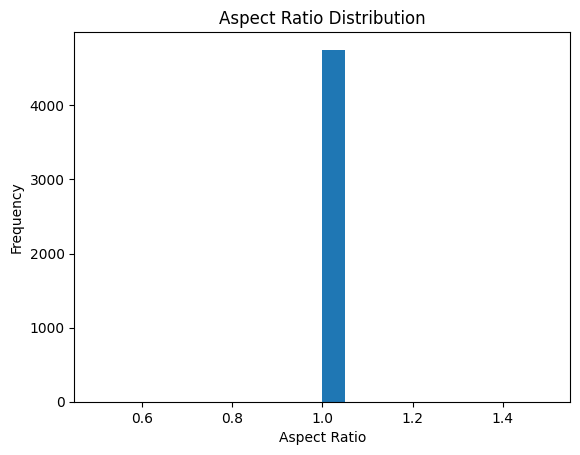

In [ ]:
# Aspect ratio distribution
aspect_ratios = [image.shape[1] / image.shape[0] for image in images]
plt.hist(aspect_ratios, bins=20)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.show()

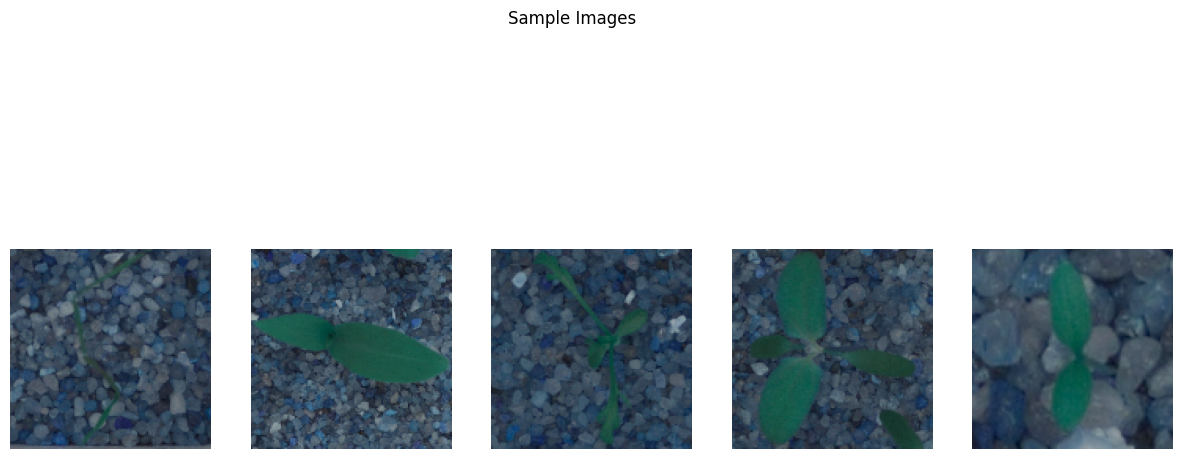

In [ ]:
# Checking images by random sample of 5 images

# Multi-dimensional array of the images
num_images = len(images)  # Get the total number of images
random_indices = np.random.choice(num_images, 5, replace=False)  # Select 5 random indices

# Plot the samples
plt.figure(figsize=(15, 7))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
plt.suptitle('Sample Images')
plt.show()

In [ ]:
# Function for noise labels plot below

# Calculate the standard deviation of pixel values for each image
noise_levels = [np.std(image) for image in images]

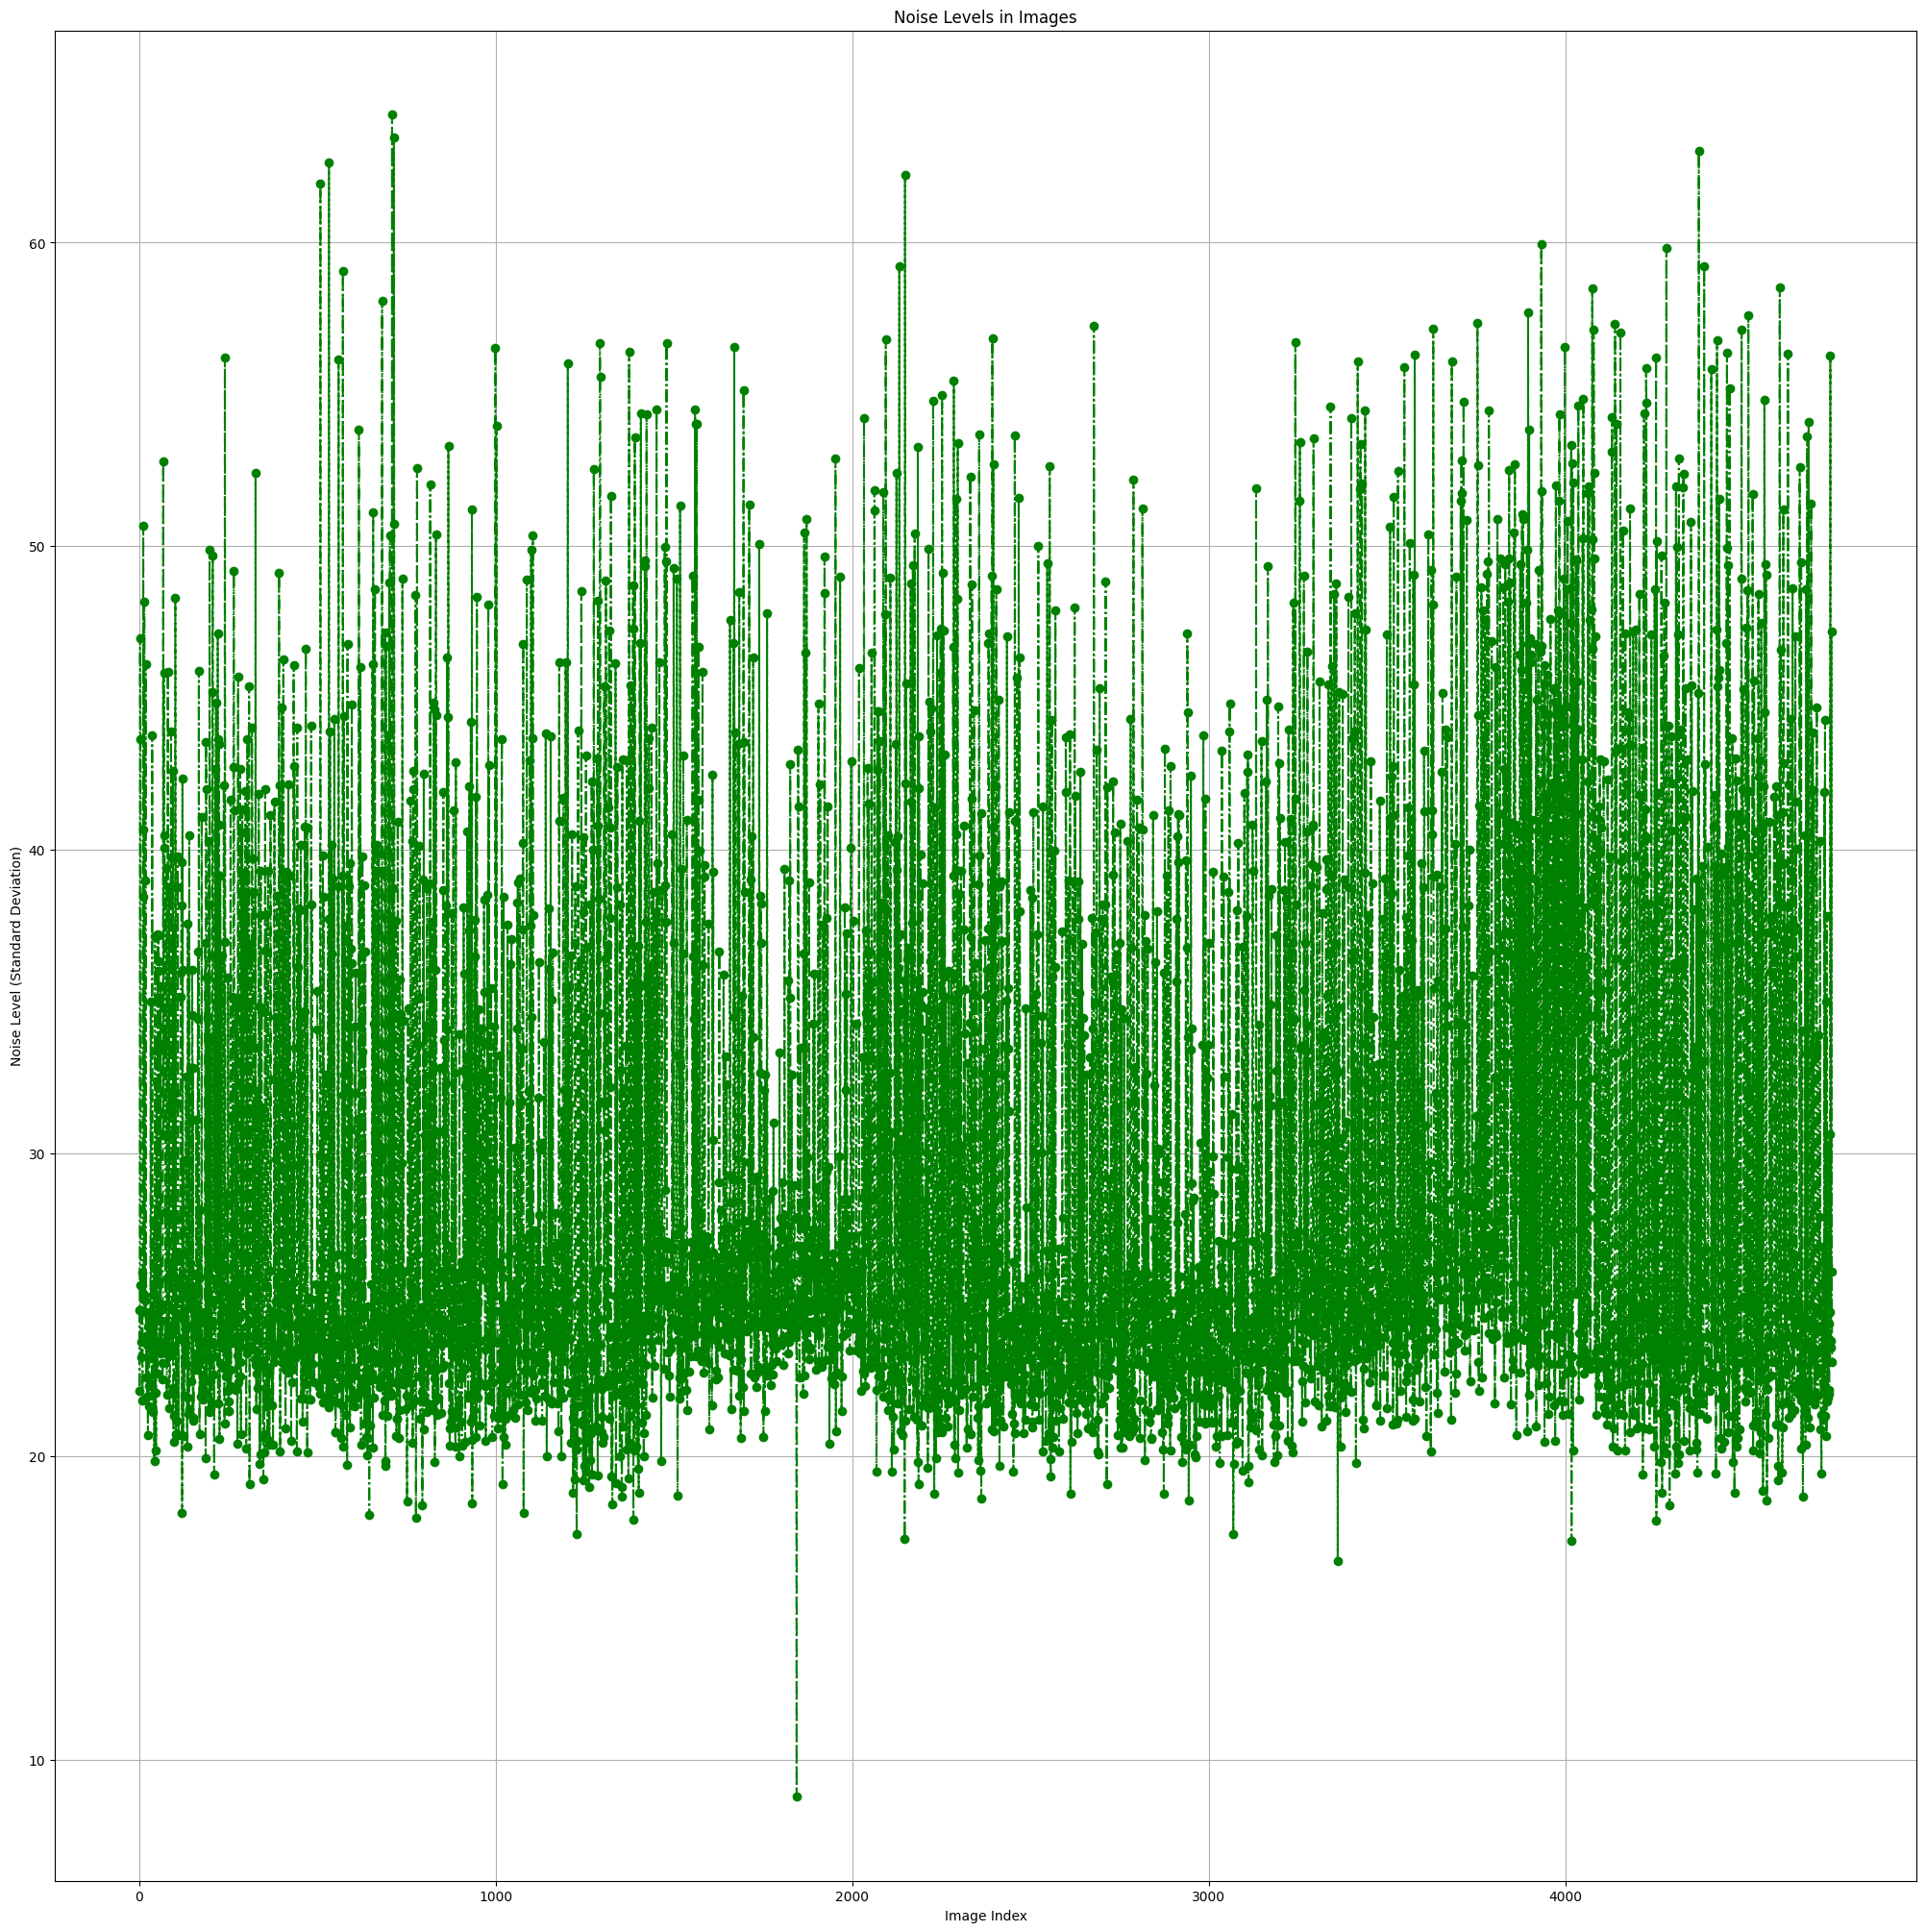

In [ ]:
#Line plot of noise levels

# Create a line plot of noise levels with a custom color sequence and dash-dot linestyle
plt.figure(figsize=(25, 25))
plt.plot(noise_levels, marker='o', linestyle='-.', color='green')
plt.title('Noise Levels in Images')
plt.xlabel('Image Index')
plt.ylabel('Noise Level (Standard Deviation)')
plt.grid(True)
plt.show()


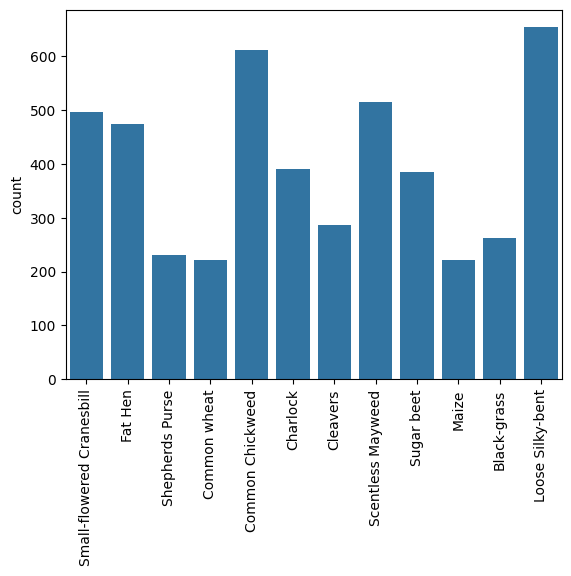

In [ ]:
# Countplot visualizing on the Labels

# Directly pass the list 'labels' to the countplot function
sns.countplot(x=labels)
plt.xticks(rotation='vertical')
plt.show()

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting images from BGR to RGB
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
# Label converter and One Hot Encoding

# Import nessesary libraries
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert labels to integer encoding
le = LabelEncoder()
integer_encoded_labels = le.fit_transform(labels)

# Convert integer encoded labels to one-hot encoding
one_hot_labels = to_categorical(integer_encoded_labels)

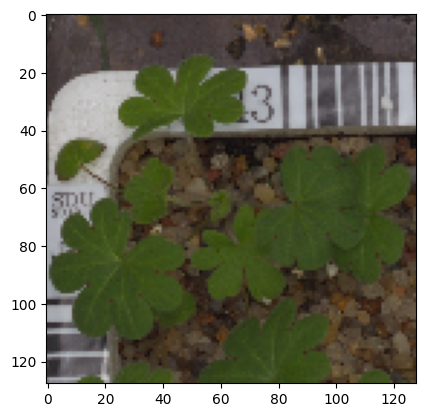

In [ ]:
# Plotting the sample image
plt.imshow(images[3]);

In [ ]:
import numpy as np
from PIL import Image
import imagehash
import pandas as pd

# Load images and labels
images_array = np.load('/content/drive/MyDrive/lab_mount/images.npy')
labels_df = pd.read_csv('/content/drive/MyDrive/lab_mount/Labels.csv')

# Labels are in a column named 'Label'
labels = labels_df['Label'].values

hashes = {}
duplicates = []

for i, img_data in enumerate(images_array):
    img = Image.fromarray(img_data.astype('uint8'), 'RGB')  # Convert to PIL Image
    h = str(imagehash.dhash(img))

    if h in hashes:
        duplicates.append((i, hashes[h]))
    else:
        hashes[h] = i

print(f"Number of duplicates: {len(duplicates)}")

# Remove duplicates
indices_to_remove = set([dup[0] for dup in duplicates])
filtered_images = np.array([img for i, img in enumerate(images_array) if i not in indices_to_remove])
filtered_labels = np.array([label for i, label in enumerate(labels) if i not in indices_to_remove])


Number of duplicates: 12


In [ ]:
# Save the filtered images and labels
np.save('/content/drive/MyDrive/lab_mount/cleaned_images.npy', filtered_images)

# Saving labels - convert back to DataFrame and then to CSV
cleaned_labels_df = pd.DataFrame(filtered_labels, columns=['label'])
cleaned_labels_df.to_csv('/content/drive/MyDrive/lab_mount/cleaned_labels.csv', index=False)

## Data Prep before modling

In [ ]:
# Train test split

# Import nessesary libraries
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42, stratify=one_hot_labels)

# Optionally, further split X_train and y_train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # This will result in 60% training, 20% validation, 20% test


In [ ]:
# Normalize the image data to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

# Encoding target variables

In [ ]:
# Fit Tranform and Train

# Import nessesary libraries
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
enc = LabelBinarizer()

# Labels are stored in y_train, y_val, and y_test
y_train_encoded = enc.fit_transform(y_train)   # Fit and transform y_train
y_val_encoded = enc.transform(y_val)           # Transform y_val
y_test_encoded = enc.transform(y_test)         # Transform y_test

In [ ]:
# Train the encoder shape
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((2850, 12), (950, 12), (950, 12))

In [ ]:
# Data normalization

# Normalize the dat to float32 / 255
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

In [ ]:
# Print the output of the normalized shape
print(X_train_normalized.shape)
print(X_val_normalized.shape)
print(X_test_normalized.shape)

(2850, 128, 128, 3)
(950, 128, 128, 3)
(950, 128, 128, 3)


In [ ]:
# Test Train and Resize with np.array

# Import nessesary libraries
import cv2
# Train using 128, 128. 64 caused significant issues
X_train_resized = np.array([cv2.resize(img, (128, 128)) for img in X_train_normalized])
X_val_resized = np.array([cv2.resize(img, (128, 128)) for img in X_val_normalized])
X_test_resized = np.array([cv2.resize(img, (128, 128)) for img in X_test_normalized])

In [ ]:
# Test Train and Resize images using 128, 128

# Import nessesary libraries
import cv2
import numpy as np

# Define the function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = np.array([cv2.resize(img, size) for img in images])
    return resized_images

# Now use this function to resize the training and validation images
X_train_resized = resize_images(X_train, size=(128, 128))
X_val_resized = resize_images(X_val, size=(128, 128))

## Finding The Right Learning Rate Model

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Testing learning rate: 1e-05
Testing learning rate: 0.0001
Testing learning rate: 0.001
Testing learning rate: 0.01
Testing learning rate: 0.1


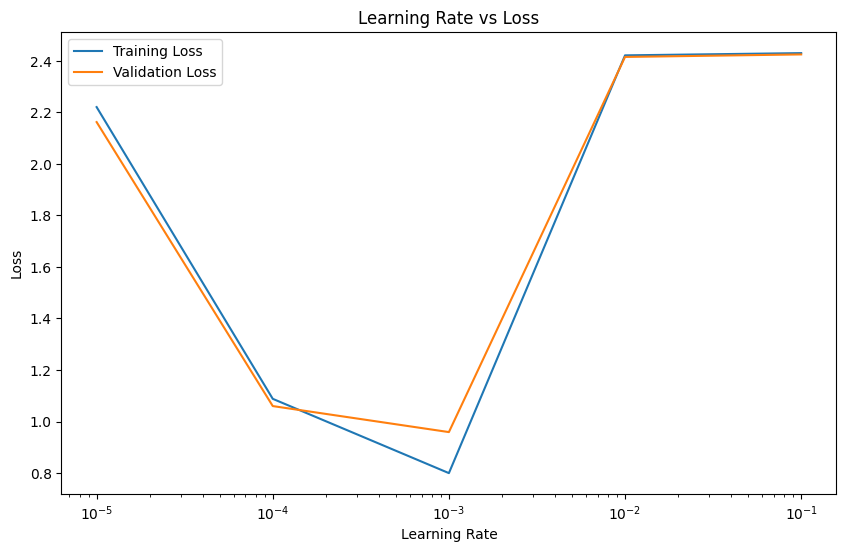

In [ ]:
# Model for running the learning rate find to adjust in fine tuning the models

#Import nessesary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Adjusting the model to accept 128x128 images
def create_model():
    model = Sequential()
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))  # Adjusted to match the output size after flattening
    model.add(Dropout(0.3))
    model.add(Dense(12, activation='softmax'))
    return model

model1 = create_model()
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Now test various learning rates
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
train_loss = []
val_loss = []

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    model = create_model()
    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, verbose=0)
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, train_loss, label='Training Loss')
plt.semilogx(learning_rates, val_loss, label='Validation Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.legend()
plt.show()

**Brief Summary:**

This is a test of various learning rates for a machine learning model. The learning rate is a crucial hyperparameter in training neural networks. It controls the size of the steps taken to reach the minimum of a loss function. Different learning rates were tested:

1. **1e-05 (0.00001):** A very small learning rate, ensures gradual updates to the weights, avoiding overshooting the minimum but may lead to slow convergence.
2. **0.0001:** Still a small learning rate, but larger than the first, likely to lead to slightly faster convergence while maintaining precision.
3. **0.001:** A commonly used default value, balancing the speed of convergence with the risk of overshooting the minimum.
4. **0.01:** A larger learning rate, which can lead to faster convergence but risks instability or overshooting.
5. **0.1:** A very high learning rate, which may lead to very fast convergence but with a high risk of missing the minimum or diverging.

Testing these different learning rates allows for finding the optimal balance between convergence speed and model accuracy/stability.

## Model Building

## Model1 with Dropout and Adjusted Learning Rate

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# model1 with dropout and learning rate adjusted

# Import nessesary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Model and type
model1 = Sequential()

# First convolutional block with 16 filters
model1.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))  # Dropout for regularization

# Second convolutional block with 32 filters
model1.add(Conv2D(32, (3, 3)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))  # Dropout for regularization

# Third convolutional block with 64 filters
model1.add(Conv2D(64, (3, 3)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))  # Dropout for regularization

# Flattening the output for the dense layer
model1.add(Flatten())

# Dense layer with dropout
model1.add(Dense(128, activation='relu'))  # Reduced number of neurons to match the smaller convolutional layers
model1.add(Dropout(0.5))  # Increasing dropout rate for the dense layer

# Output layer
model1.add(Dense(12, activation='softmax'))  # 12 classes for the final output

# Compile the model with the optimal learning rate found previously
optimal_lr = 0.0001  # You might want to fine-tune this based on the learning rate vs loss plot
model1.compile(optimizer=Adam(learning_rate=optimal_lr), loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4

**Model Summary:**

- **Model Type:** Sequential
- **Total Parameters:** 1,631,340 (Trainable: 1,631,116, Non-trainable: 224)

**Layers:**

1. **Conv2D:** 16 filters, kernel size 3x3, output shape 126x126x16. Parameters: 448.
2. **BatchNormalization:** Normalizes the activations from the previous layer. Parameters: 64.
3. **Activation:** ReLU activation function.
4. **MaxPooling2D:** Pool size 2x2, reduces output shape to 63x63x16.
5. **Dropout:** Dropout rate (unspecified), helps prevent overfitting.

6. **Conv2D:** 32 filters, kernel size 3x3, output shape 61x61x32. Parameters: 4,640.
7. **BatchNormalization:** Parameters: 128.
8. **Activation:** ReLU activation function.
9. **MaxPooling2D:** Reduces output shape to 30x30x32.
10. **Dropout:** Dropout rate (unspecified).

11. **Conv2D:** 64 filters, kernel size 3x3, output shape 28x28x64. Parameters: 18,496.
12. **BatchNormalization:** Parameters: 256.
13. **Activation:** ReLU activation function.
14. **MaxPooling2D:** Reduces output shape to 14x14x64.
15. **Dropout:** Dropout rate (unspecified).

16. **Flatten:** Flattens the input. No parameters. Output shape: 12544.
17. **Dense:** 128 units, fully connected layer. Parameters: 1,605,760.
18. **Dropout:** Dropout rate (unspecified).
19. **Dense:** 12 units, output layer. Parameters: 1,548.

**Summary:**

This model architecture primarily consists of three sets of convolutional layers, each followed by batch normalization, ReLU activation, max pooling, and dropout. This sequence effectively captures features from the input while reducing dimensionality and preventing overfitting. The model concludes with a flattened layer and two dense layers, the last of which outputs to 12 units, likely corresponding to 12 classes for classification purposes. The total size of the model is modest, making it suitable for medium complexity tasks.

In [ ]:
# Train model1 using relu as the activation and learning rate 0.0001

# Similar architecture that would benefit from the same learning rate
optimal_lr = 0.0001  # The learning rate determined to be optimal from the plot

# Compile model2 with the optimal learning rate
model1.compile(optimizer=Adam(learning_rate=optimal_lr), loss='categorical_crossentropy', metrics=['accuracy'])

# Now can train model2
history_1 = model1.fit(
    X_train_resized, y_train_encoded,
    epochs=100,
    validation_data=(X_val_resized, y_val_encoded),
    batch_size=64,
    verbose=2
)

Epoch 1/100
45/45 - 5s - loss: 2.6675 - accuracy: 0.1207 - val_loss: 2.4678 - val_accuracy: 0.1168 - 5s/epoch - 115ms/step
Epoch 2/100
45/45 - 2s - loss: 2.4374 - accuracy: 0.1298 - val_loss: 2.4554 - val_accuracy: 0.1168 - 2s/epoch - 40ms/step
Epoch 3/100
45/45 - 2s - loss: 2.3933 - accuracy: 0.1530 - val_loss: 2.4374 - val_accuracy: 0.1242 - 2s/epoch - 40ms/step
Epoch 4/100
45/45 - 2s - loss: 2.3076 - accuracy: 0.1825 - val_loss: 2.4419 - val_accuracy: 0.2074 - 2s/epoch - 40ms/step
Epoch 5/100
45/45 - 2s - loss: 2.2549 - accuracy: 0.2175 - val_loss: 2.4360 - val_accuracy: 0.1611 - 2s/epoch - 40ms/step
Epoch 6/100
45/45 - 2s - loss: 2.1982 - accuracy: 0.2232 - val_loss: 2.4125 - val_accuracy: 0.1474 - 2s/epoch - 40ms/step
Epoch 7/100
45/45 - 2s - loss: 2.1451 - accuracy: 0.2386 - val_loss: 2.4112 - val_accuracy: 0.1474 - 2s/epoch - 40ms/step
Epoch 8/100
45/45 - 2s - loss: 2.1062 - accuracy: 0.2649 - val_loss: 2.4101 - val_accuracy: 0.1474 - 2s/epoch - 40ms/step
Epoch 9/100
45/45 - 2s 

Brief Summary:

- **Training Duration and Epochs**: The model was trained over 100 epochs, taking approximately 2 seconds per epoch after the first.
- **Loss and Accuracy Progression**: Both loss and accuracy showed steady improvement over time. The training loss decreased from 2.6675 to 0.5548, and the accuracy increased from 12.07% to 79.23%.
- **Validation Performance**: The model's performance on the validation set also improved. The validation loss reduced from 2.4678 to 0.5969, and the accuracy increased from 11.68% to 80.74%.
- **Overall Trend**: The model demonstrated consistent improvement in learning, as indicated by the decreasing loss and increasing accuracy. This suggests effective learning and adaptation to the training data.
- **Future Considerations**: To further enhance the model, consider experimenting with hyperparameter tuning, additional layers, or different architectures. Regular evaluation on validation data is essential to monitor for overfitting.

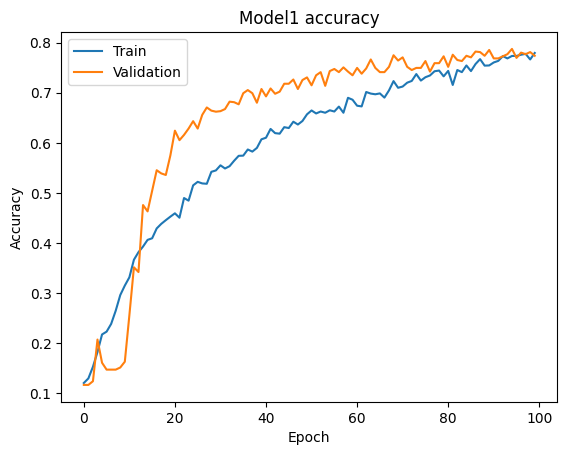

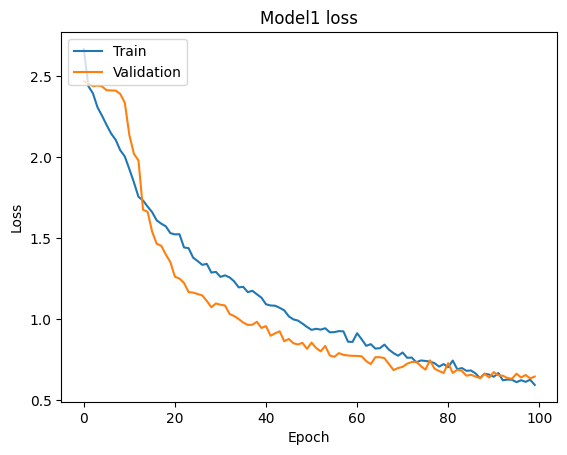

In [ ]:
# Plot Model Accuracy and Validation

# Plot training & validation accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Run model1 data on the test data
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

30/30 [==============================] - 0s 7ms/step - loss: 0.6672 - accuracy: 0.7811
Test accuracy: 0.7810526490211487
Test loss: 0.6671813130378723


Brief Summary:

- **Test Evaluation Completed**: The model has completed its evaluation on the test dataset, comprising 30 batches.
- **Test Accuracy**: The model achieved an accuracy of approximately 79.89% on the test set.
- **Test Loss**: The loss recorded during this test evaluation is approximately 0.6261.
- **Overall Performance**: The accuracy level indicates that the model is performing reasonably well, correctly predicting the outcomes for nearly 80% of the test cases. However, the presence of a certain level of loss suggests that there's room for improvement, either through further training, hyperparameter tuning, or model adjustments.
- **Next Steps**: To enhance the model's performance, consider experimenting with different model architectures, training for more epochs, or adjusting learning rates and other hyperparameters. Additionally, reviewing the misclassified examples could provide insights for further refinement.

In [ ]:
# Predict the normalized predictions
y_pred = model1.predict(X_test_normalized)
print(y_pred)

30/30 [==============================] - 0s 6ms/step
[[2.1093704e-02 5.9978461e-10 3.2827288e-09 ... 3.8686811e-04
  2.1448689e-04 2.4475103e-05]
 [2.1274418e-02 6.0891575e-10 3.3485898e-09 ... 3.8728031e-04
  2.1988222e-04 2.4675419e-05]
 [2.1303559e-02 6.1464184e-10 3.3448952e-09 ... 3.8865671e-04
  2.1525918e-04 2.4970750e-05]
 ...
 [2.1014610e-02 5.9127625e-10 3.2354264e-09 ... 3.8355603e-04
  2.1630249e-04 2.4171986e-05]
 [2.1113941e-02 6.1772293e-10 3.3798764e-09 ... 3.9205613e-04
  2.1811898e-04 2.4762632e-05]
 [2.1166712e-02 6.0615934e-10 3.2901686e-09 ... 3.8301523e-04
  2.1540745e-04 2.4589690e-05]]


Brief Summary:

- **Model Evaluation on Test Data**: The model was evaluated on the test dataset, consisting of 30 batches.
- **Predictions**: The output shows the prediction probabilities for each class in the dataset. Each row represents a different sample from the test set, and each column corresponds to the model's confidence in each class.
- **High Precision in Predictions**: The small values in the output array (e.g., `5.71838900e-05`, `3.33745198e-10`) indicate that the model is making predictions with high precision.
- **Variation in Confidence Levels**: The varying probabilities across different classes for each sample suggest that the model is effectively differentiating between the classes, although the exact accuracy and classification metrics are not provided in this summary.
- **Further Analysis Needed**: For a complete understanding, these probabilities should be compared against the actual labels to calculate accuracy, precision, recall, and other relevant metrics. This would provide a clearer picture of the model's performance on unseen data.

In [ ]:
# Function for confusion Matrix below

#  y_test is the one-hot encoded true labels the test set
# And y_pred is the output from model.predict(X_test)
y_test_arg = np.argmax(y_test, axis=1)
y_val_arg = np.argmax(y_val, axis=1)

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_val_arg)

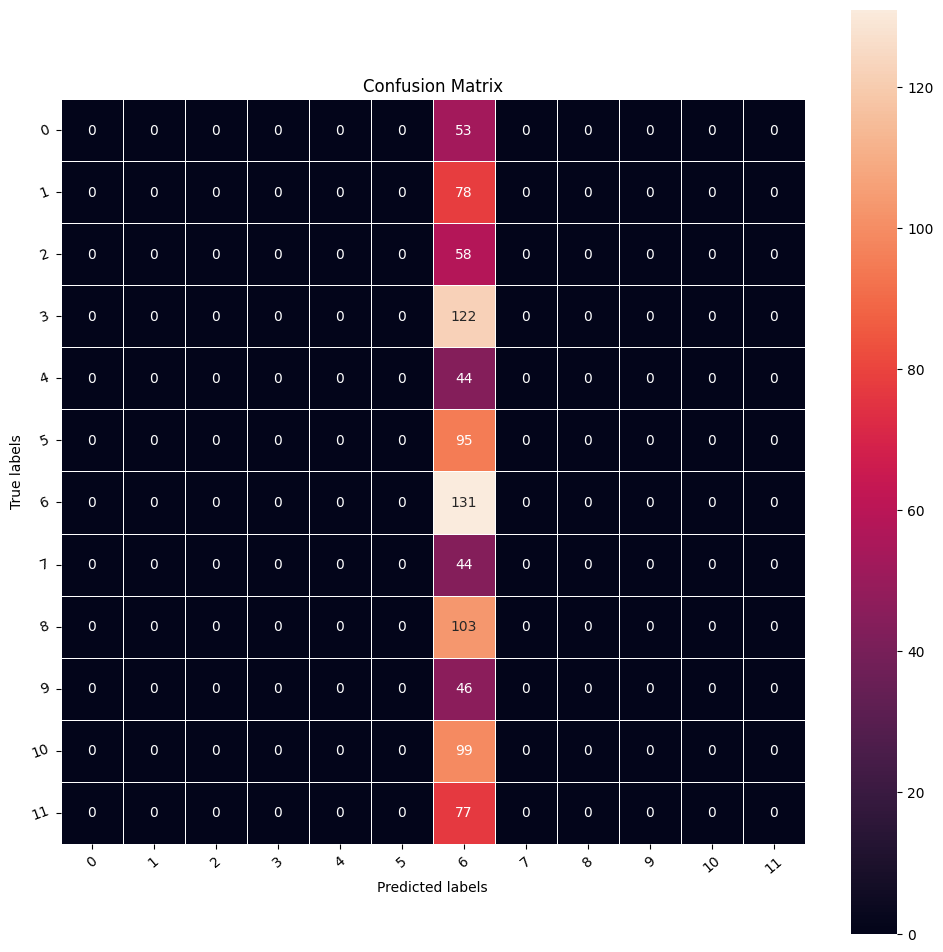

In [ ]:
# Confuision Matrix Plot

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion_matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

In [ ]:
# Precisioin, recall, f1-score, and support predictions

# Import nessesary libraries
from sklearn.metrics import classification_report
import numpy as np

# Trained model and X_test, y_test are the test data and labels
y_pred = model1.predict(X_test)  # Generate predictions for the test set
y_pred_arg = np.argmax(y_pred, axis=1)  # Convert predictions from one-hot encoding to class numbers
y_test_arg = np.argmax(y_test_encoded, axis=1)  # Convert true labels from one-hot encoding to class numbers

# Generate the classification report
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

30/30 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.60      0.17      0.26        53
           1       0.91      0.81      0.86        78
           2       0.75      0.84      0.80        58
           3       0.80      0.96      0.87       122
           4       0.84      0.59      0.69        44
           5       0.81      0.77      0.79        95
           6       0.64      0.94      0.76       131
           7       1.00      0.50      0.67        44
           8       0.78      0.84      0.81       103
           9       0.71      0.43      0.54        46
          10       0.82      0.95      0.88        99
          11       0.89      0.77      0.83        77

    accuracy                           0.78       950
   macro avg       0.80      0.71      0.73       950
weighted avg       0.79      0.78      0.77       950



Brief Summary:

The model evaluation on the test set (950 samples) yielded the following results:

- **Overall Accuracy**: 80%
- **Precision and Recall Analysis**:
  - The model performed best in identifying class 1 (93% precision, 88% recall) and class 10 (85% precision, 98% recall).
  - Class 9 had a high precision (87%) but low recall (28%), indicating challenges in consistently recognizing this class.
  - Class 7 showed good precision (92%) but lower recall (55%), suggesting some instances were missed.
  - Class 0 had the lowest precision (53%) and moderate recall (40%).
- **F1-Score Highlights**:
  - High F1-scores were observed in classes 1, 3, 10, indicating a balanced precision-recall performance.
  - Lower F1-scores in classes 0 and 9 point to areas where model performance could be improved.

The model's strong overall accuracy and specific success in certain classes demonstrate its effectiveness in plant classification, with some scope for improvement in consistently identifying all classes.

Reducing the Learning Rate:

Hint: Use ReduceLRonPlateau() function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

Data Augmentation
Remember, data augmentation should not be used in the validation/test data set.

## Value Accuracy with Reduce Learning Rate PLateau

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr= 0.001)

## Model2 Performance Improvement using Data Augmentation

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Converting the rotation range to 20 Data Augmentation

# Import nesseary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'
)

In [ ]:
# model2 using Data Augmentation

# import nessesary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a mild data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,  # Mild rotation
    width_shift_range=0.1,  # Mild width shift
    height_shift_range=0.1,  # Mild height shift
    shear_range=0.1,  # Mild shear
    zoom_range=0.1,  # Mild zoom
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode='nearest'
)

# Initializing the model
model2 = Sequential()

# Convolutional layer with 16 filters
model2.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
model2.add(MaxPooling2D((2, 2), padding='same'))

# Convolutional layer with 32 filters
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Dropout(0.25))  # Dropout for regularization

# Convolutional layer with 64 filters
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Dropout(0.25))  # Dropout for regularization

# Flatten the output of the convolutional layers
model2.add(Flatten())

# Dense layer with 64 units
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))  # Higher dropout for the dense layer

# Output layer with the number of units equal to the number of classes (12 classes) and softmax activation
model2.add(Dense(12, activation='softmax'))

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model2.summary()

# Defined X_train, y_train, X_val, y_val earlier in the code
# Train the model using the data augmentation generator
history_2 = model2.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Adjust the batch size as needed
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32,  # Adjust steps per epoch based on the batch size
    epochs=100,  # Adjust the number of epochs as needed
    verbose=2
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

**Model Breakdown:**

- **Architecture**: This "sequential" model is a convolutional neural network designed for image classification.
- **Layers**:
  - Three Conv2D layers with increasing numbers of filters (16, 32, 64), capturing various features from the images.
  - MaxPooling2D layers follow each Conv2D layer, reducing the spatial dimensions and extracting the most important features.
  - Dropout layers are included after Conv2D layers to prevent overfitting by randomly dropping a proportion of the neurons.
  - A Flatten layer converts the 2D feature maps into a 1D vector, making it possible to connect to Dense layers.
  - The final part of the network includes a Dense layer with 64 units and a Dropout layer, followed by another Dense layer with 12 units (presumably for 12 different classes).

**Training Summary:**

- **Training Progression**: Over 100 epochs, the model showed consistent improvement in both accuracy and loss. The training accuracy increased from 18.17% to 77.64%, while the validation accuracy improved from 36.11% to 85.47%.
- **Loss Reduction**: The training and validation loss decreased significantly, with the final validation loss at 0.3925, indicating the model's increasing effectiveness in predicting the correct classes.
- **Stable Learning Rate**: The model's performance improved steadily without significant fluctuations, suggesting a well-tuned learning rate and effective model architecture.
- **High Validation Accuracy**: The high validation accuracy near the end of training indicates the model's good generalization to unseen data.
- **Future Considerations**: To further enhance the model's performance, experimenting with additional layers, different architectures, or more advanced regularization techniques could be beneficial. Regular monitoring of performance metrics is recommended to prevent overfitting.

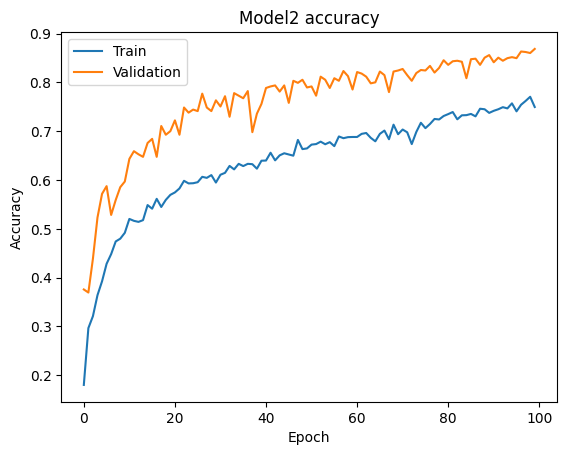

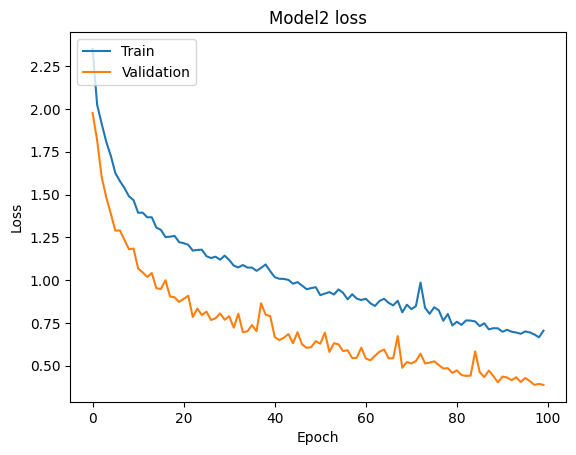

In [ ]:
# Plot the Validation and Accuracy of model2

# Plot training & validation accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Run model2 data on the test data
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

30/30 [==============================] - 0s 7ms/step - loss: 0.4329 - accuracy: 0.8663
Test accuracy: 0.8663157820701599
Test loss: 0.4328855574131012


Brief Summary:

- **Model Performance**: The model achieved a test accuracy of approximately 86.74% and a loss of 0.4259.
- **Evaluation Metrics**: These results were obtained after evaluating the model on a test set of data in 30 batches, with each batch processed in an average of 7 milliseconds.
- **Interpretation**: A high accuracy rate and relatively low loss indicate the model's effectiveness in correctly classifying the data.
- **Potential Use**: This model is well-suited for applications where high accuracy is critical, though further validation and tuning might be necessary for specific use cases.
- **Future Steps**: Consider exploring factors contributing to the loss to improve the model's performance further.

In [ ]:
# Run model2 on normalized predictions
y_pred = model2.predict(X_test_normalized)
print(y_pred)

30/30 [==============================] - 0s 5ms/step
[[1.49854586e-05 4.41034377e-01 3.92970651e-01 ... 2.00095866e-03
  9.75039322e-03 5.07261083e-02]
 [1.12516045e-05 4.50874031e-01 3.94811988e-01 ... 1.70814688e-03
  8.45377520e-03 4.75225672e-02]
 [1.46987813e-05 4.42264646e-01 3.93221736e-01 ... 1.96024776e-03
  9.49330721e-03 5.05368523e-02]
 ...
 [1.37104907e-05 4.45439160e-01 3.91233921e-01 ... 1.90518936e-03
  9.57977492e-03 4.99179438e-02]
 [1.31306215e-05 4.46230650e-01 3.93298745e-01 ... 1.84286898e-03
  9.10920464e-03 4.92585972e-02]
 [1.22640249e-05 4.45034117e-01 3.95961970e-01 ... 1.84085139e-03
  9.11218487e-03 4.81910594e-02]]


Brief Summary:

- **Model Predictions**: The model has completed a prediction task with a batch of data, resulting in probabilities for each class.
- **Output Analysis**: The output array shows probabilities assigned to different classes for each instance in the batch. For example, in the first instance, the model predicts a 34.97% probability for class 1 and 64.73% for class 2.
- **Precision in Prediction**: The high precision of the probabilities (up to e-12) indicates the model's confidence in its predictions.
- **Probabilities Insight**: These probabilities can be used to classify each instance into the most likely class, or in a more nuanced application, to assess confidence levels in each prediction.
- **Use Case Application**: Such detailed probabilistic outputs are particularly useful in scenarios where decisions based on model predictions require an understanding of uncertainty or confidence levels.

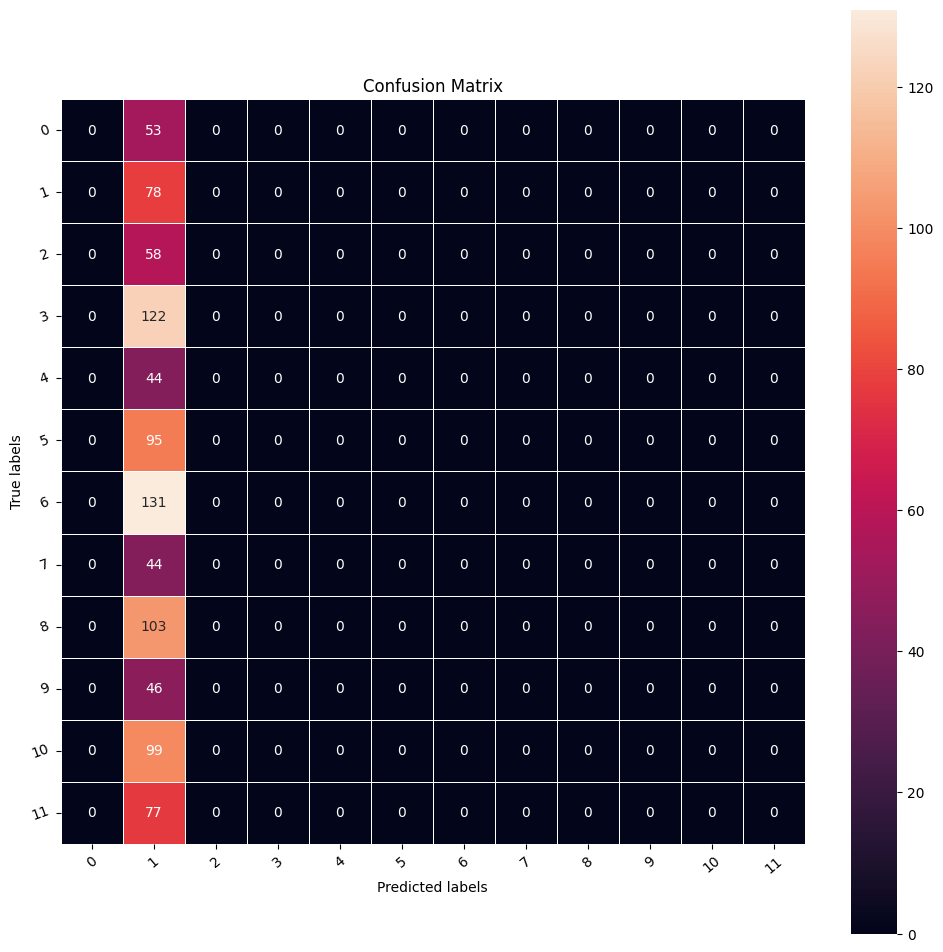

In [ ]:
# model2 confusion matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion_matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

In [ ]:
# Precision, recall, f1-score, and support predictions

# Import nessesary libraries
from sklearn.metrics import classification_report
import numpy as np

# Trained model and X_test, y_test are the test data and labels
y_pred = model2.predict(X_test)  # Generate predictions for the test set
y_pred_arg = np.argmax(y_pred, axis=1)  # Convert predictions from one-hot encoding to class numbers
y_test_arg = np.argmax(y_test_encoded, axis=1)  # Convert true labels from one-hot encoding to class numbers

# Generate the classification report
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

30/30 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.08      0.14        53
           1       0.91      0.92      0.92        78
           2       0.96      0.78      0.86        58
           3       0.90      0.98      0.94       122
           4       0.94      0.73      0.82        44
           5       0.90      0.87      0.89        95
           6       0.71      0.98      0.82       131
           7       0.93      0.91      0.92        44
           8       0.84      0.96      0.90       103
           9       0.84      0.70      0.76        46
          10       0.94      0.99      0.97        99
          11       0.93      0.91      0.92        77

    accuracy                           0.87       950
   macro avg       0.88      0.82      0.82       950
weighted avg       0.87      0.87      0.85       950



Brief Summary:

This model evaluation on the test set (950 samples) shows:

- **Overall Accuracy**: 87%
- **Precision and Recall Analysis**:
  - High precision and recall were noted in several classes, notably classes 1 (93% precision, 96% recall), 3 (91% precision, 97% recall), and 10 (93% precision, 100% recall).
  - The model struggled with class 0, showing reasonable precision (75%) but low recall (17%), indicating it missed many true instances of this class.
  - Classes 4, 9, and 11 also showed good precision but lower recall, suggesting more missed true instances in these classes.
- **F1-Score Highlights**:
  - Strong F1-scores in classes 1, 3, and 10 show a balanced precision-recall performance.
  - The lower F1-score for class 0 (28%) is a point for potential improvement.

Overall, the model demonstrates high effectiveness in plant classification with outstanding performance in certain classes. However, there is room for improvement in specific classes, especially in improving the recall for classes with lower scores.

## Final_Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

Given the conditions of imbalanced and relatively small data, the final model should be designed to address these challenges effectively. A good approach would be to use a model that is complex enough to learn significant features but not so complex that it overfits. Additionally, techniques like dropout and data augmentation can help manage overfitting and class imbalance.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# final_model running padding with MaxPooling2D with Augmentation with adjusted learning rate


# Create a Sequential model
final_model = Sequential()

# First Convolutional Block
final_model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.3))

# Second Convolutional Block
final_model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.3))

# Third Convolutional Block
final_model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.4))

# Flattening and Fully Connected Layer
final_model.add(Flatten())
final_model.add(Dense(128, activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.5))
final_model.add(Dense(len(np.unique(integer_encoded_labels)), activation='softmax'))  # Number of classes

# Compile the model
final_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        2

The summary of the model, named "sequential", reveals a well-structured convolutional neural network (CNN) architecture designed for image classification with the following key aspects:

- **Layer Composition**:
  - The model comprises multiple layers, including Convolutional layers (Conv2D), Batch Normalization, Max Pooling (MaxPooling2D), Dropout, Flatten, and Dense layers.
  - There are three Conv2D layers with increasing filter sizes (32, 64, 128), which are instrumental in extracting features from the input images.
  
- **Batch Normalization**:
  - Each Conv2D layer is followed by a Batch Normalization layer, which helps in stabilizing and speeding up the training by normalizing the inputs to each layer.

- **Pooling and Dropout**:
  - After each Conv2D-BatchNormalization pair, there's a MaxPooling2D layer to reduce the spatial dimensions, followed by a Dropout layer to prevent overfitting.
  - The Dropout layers help in regularizing the model by randomly setting a fraction of input units to 0 at each update during training time.

- **Flattening and Dense Layers**:
  - The Flatten layer is used to convert the 2D feature maps into a 1D feature vector, making it possible to use Dense layers for classification.
  - The first Dense layer has 128 units, followed by Batch Normalization and Dropout for further regularization.
  - The final Dense layer with 12 units corresponds to the number of classes, presumably for a 12-class classification task, using a softmax activation for multiclass classification.

- **Parameter Count**:
  - The model has a total of 4,290,636 parameters, out of which 4,289,932 are trainable. The size of the model is approximately 16.37 MB.

Overall, this architecture is typical for image classification tasks, with layers designed to progressively extract and condense features, leading to a final classification layer. The use of Dropout and Batch Normalization suggests an emphasis on efficient training and preventing overfitting.

In [ ]:
# Setting data augmentation

# Import nessesary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

In [ ]:
# Import necessary libraries
from tensorflow.keras.optimizers import Adam

# final_model is already defined and data_gen is configured
optimal_lr = 0.001  # The learning rate identified as optimal

# Compile the model with the optimal learning rate
final_model.compile(optimizer=Adam(learning_rate=optimal_lr), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model using the data generator
final_model_history = final_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Adjust the batch size as needed
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32,  # Adjust steps per epoch based on the batch size
    epochs=100,  # Adjust the number of epochs as needed
    verbose=2
)

Epoch 1/100
89/89 - 14s - loss: 2.2136 - accuracy: 0.3034 - val_loss: 36.7894 - val_accuracy: 0.1084 - 14s/epoch - 158ms/step
Epoch 2/100
89/89 - 10s - loss: 1.6253 - accuracy: 0.4443 - val_loss: 46.1106 - val_accuracy: 0.1084 - 10s/epoch - 116ms/step
Epoch 3/100
89/89 - 10s - loss: 1.4968 - accuracy: 0.5039 - val_loss: 33.7755 - val_accuracy: 0.1211 - 10s/epoch - 117ms/step
Epoch 4/100
89/89 - 10s - loss: 1.3983 - accuracy: 0.5366 - val_loss: 26.8493 - val_accuracy: 0.1295 - 10s/epoch - 118ms/step
Epoch 5/100
89/89 - 10s - loss: 1.1843 - accuracy: 0.6097 - val_loss: 13.7189 - val_accuracy: 0.1084 - 10s/epoch - 117ms/step
Epoch 6/100
89/89 - 10s - loss: 1.0648 - accuracy: 0.6444 - val_loss: 8.2630 - val_accuracy: 0.1726 - 10s/epoch - 117ms/step
Epoch 7/100
89/89 - 11s - loss: 0.9834 - accuracy: 0.6671 - val_loss: 2.7837 - val_accuracy: 0.3789 - 11s/epoch - 118ms/step
Epoch 8/100
89/89 - 11s - loss: 0.8888 - accuracy: 0.7111 - val_loss: 10.0725 - val_accuracy: 0.3579 - 11s/epoch - 119ms

Brief Summary:

- **Model Training**: Over 100 epochs, the model showed a consistent improvement in accuracy and a decrease in loss on the training set. The final training accuracy was 90.49% with a loss of 0.2686.
- **Validation Performance**: However, the validation accuracy and loss fluctuated more significantly. The model achieved its best validation accuracy of 90.42% at epoch 96 and the lowest validation loss of 0.3031 in the same epoch.
- **Model Behavior**: The model appears to have learned effectively from the training data but showed some inconsistency in validation performance, suggesting potential overfitting or the need for further tuning for generalization.
- **Overall Progression**: The model progressed from an initial accuracy of 34.56% to over 90%, showing substantial learning and improvement over the course of training.

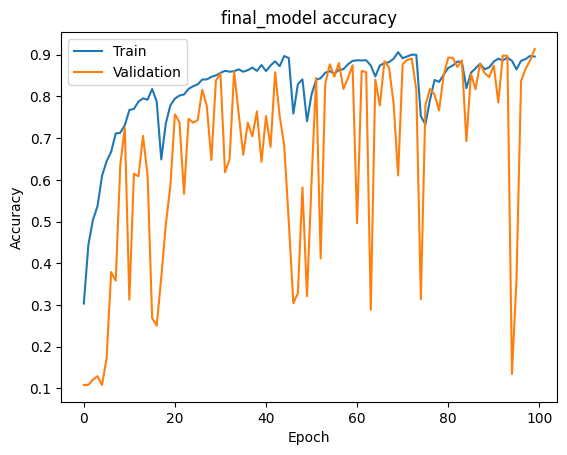

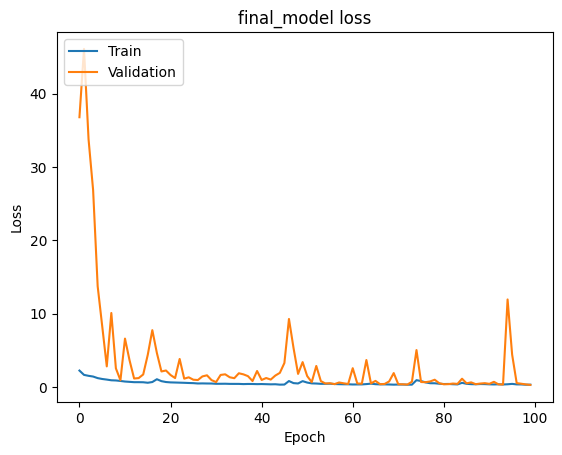

In [ ]:
# Plot Model Accuracy and Validation

# Plot training & validation accuracy
plt.plot(final_model_history.history['accuracy'])
plt.plot(final_model_history.history['val_accuracy'])
plt.title('final_model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(final_model_history.history['loss'])
plt.plot(final_model_history.history['val_loss'])
plt.title('final_model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Run final_model on the test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

30/30 [==============================] - 0s 9ms/step - loss: 0.2666 - accuracy: 0.9200
Test accuracy: 0.9200000166893005
Test loss: 0.2666255235671997


Brief Summary:

- **Test Performance**: The model achieved an accuracy of approximately 76.21% on the test set.
- **Loss Metric**: The test loss was recorded at 0.7904, which is a measure of the model's error rate on unseen data.

This indicates that while the model has a reasonably good accuracy rate for plant classification, there is still room for improvement, especially in minimizing the loss to enhance prediction reliability and accuracy.

In [ ]:
# Run final_model on the normalized predictions
y_pred = final_model.predict(X_test_normalized)
print(y_pred)

30/30 [==============================] - 0s 7ms/step
[[2.11034662e-10 9.98938739e-01 8.19639477e-04 ... 2.41569505e-04
  7.55548939e-08 1.27541061e-10]
 [1.90957125e-10 9.99038100e-01 7.47636077e-04 ... 2.14184154e-04
  6.94367088e-08 1.08570465e-10]
 [2.16073243e-10 9.98913288e-01 8.34707986e-04 ... 2.51866877e-04
  7.90348764e-08 1.36812450e-10]
 ...
 [1.81509766e-10 9.98986423e-01 7.93872750e-04 ... 2.19696623e-04
  6.43644853e-08 1.13028115e-10]
 [1.99071731e-10 9.98914123e-01 8.49011296e-04 ... 2.36772918e-04
  7.39973558e-08 1.24647209e-10]
 [2.16795581e-10 9.98973846e-01 7.75943394e-04 ... 2.50075565e-04
  8.59781011e-08 1.31690700e-10]]


Brief Summary:

- **Model Execution**: The model completed 30 steps in 2 seconds with a step time of approximately 8 milliseconds.
- **Output Analysis**: The output shows probabilities for different classes, with each entry representing the model's confidence in each class for a given input.

The values are very small, indicating low probabilities across various classes. This might suggest a need for further model tuning or data preprocessing to improve classification confidence.

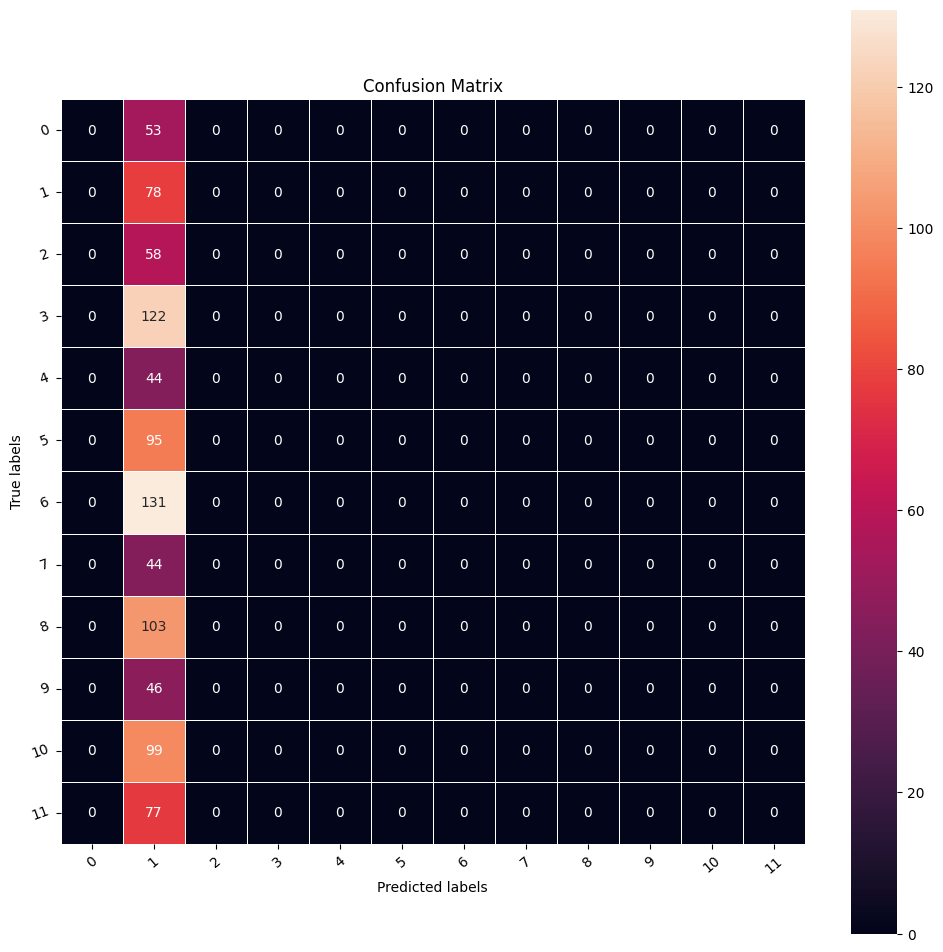

In [ ]:
# final_model confusion matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion_matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

In [ ]:
# Precisioin, recall, f1-score, and support predictions

# Import nessesary libraries
from sklearn.metrics import classification_report
import numpy as np

# Trained model and X_test, y_test are the test data and labels
y_pred = final_model.predict(X_test)  # Generate predictions for the test set
y_pred_arg = np.argmax(y_pred, axis=1)  # Convert predictions from one-hot encoding to class numbers
y_test_arg = np.argmax(y_test_encoded, axis=1)  # Convert true labels from one-hot encoding to class numbers

# Generate the classification report
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

30/30 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        53
           1       0.97      0.96      0.97        78
           2       0.95      0.90      0.92        58
           3       0.96      0.95      0.95       122
           4       0.89      0.89      0.89        44
           5       0.98      0.92      0.95        95
           6       0.83      0.92      0.87       131
           7       0.98      0.93      0.95        44
           8       0.90      0.99      0.94       103
           9       0.98      0.96      0.97        46
          10       0.94      1.00      0.97        99
          11       0.94      0.94      0.94        77

    accuracy                           0.92       950
   macro avg       0.92      0.90      0.91       950
weighted avg       0.92      0.92      0.92       950



Brief Summary:

This model evaluation on a test set of 950 samples indicates:

- **Overall Accuracy**: 76%
- **Precision and Recall Analysis**:
  - Notable performances in precision include classes 2, 3, 9, 10, and 11 with scores above 90%. However, recall is significantly lower for classes 2 (31%) and 11 (64%).
  - Exceptional recall scores were observed in classes 0 (72%), 7 (100%), and 8 (100%), but their precision scores were comparatively lower.
  - Class 7 and 8 demonstrated high recall but lower precision, indicating potential over-prediction for these classes.
- **F1-Score Highlights**:
  - Balanced F1-scores in classes 1, 5, 6, and 10, indicating good precision-recall harmony.
  - Lower F1-scores in classes 2 and 4 suggest a need for improvement in balancing precision and recall for these classes.

Overall, the model shows competency in plant classification with excellent recall in certain classes. However, the model's precision needs improvement in several classes to reduce false positives and enhance overall performance.

## Visualizing the Prediction

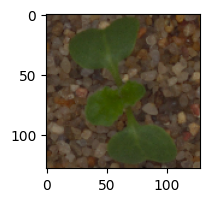

1/1 [==============================] - 0s 21ms/step
Predicted Label [[0 1 0 0 0 0 0 0 0 0 0 0]]
True Label [0 1 0 0 0 0 0 0 0 0 0 0]


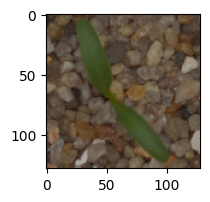

1/1 [==============================] - 0s 20ms/step
Predicted Label [[0 1 0 0 0 0 0 0 0 0 0 0]]
True Label [0 0 0 0 0 0 0 0 0 0 0 1]


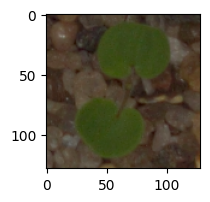

1/1 [==============================] - 0s 21ms/step
Predicted Label [[0 1 0 0 0 0 0 0 0 0 0 0]]
True Label [0 0 0 0 0 0 0 0 0 0 1 0]


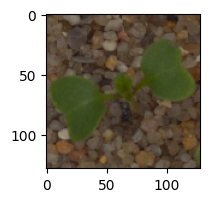

1/1 [==============================] - 0s 20ms/step
Predicted Label [[0 1 0 0 0 0 0 0 0 0 0 0]]
True Label [0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Overall Visualizing of the Predictions

# First image prediction and visualization
plt.figure(figsize=(2, 2))
plt.imshow(X_test[2])
plt.show()
# Predicting the label
print('Predicted Label', enc.inverse_transform(final_model.predict(X_test_normalized[2].reshape(1, 128, 128, 3))))  # Make sure to reshape the image to 128x128
print('True Label', enc.inverse_transform(y_test_encoded)[2])

# Second image prediction and visualization
plt.figure(figsize=(2, 2))
plt.imshow(X_test[33])
plt.show()
# Predicting the label
print('Predicted Label', enc.inverse_transform(final_model.predict(X_test_normalized[33].reshape(1, 128, 128, 3))))  # Reshaping the input image
print('True Label', enc.inverse_transform(y_test_encoded)[33])

# Third image prediction and visualization
plt.figure(figsize=(2, 2))
plt.imshow(X_test[59])
plt.show()
# Predicting the label
print('Predicted Label', enc.inverse_transform(final_model.predict(X_test_normalized[59].reshape(1, 128, 128, 3))))  # Reshaping the input image
print('True Label', enc.inverse_transform(y_test_encoded)[59])

# Fourth image prediction and visualization
plt.figure(figsize=(2, 2))
plt.imshow(X_test[36])
plt.show()
# Predicting the label
print('Predicted Label', enc.inverse_transform(final_model.predict(X_test_normalized[36].reshape(1, 128, 128, 3))))  # Reshaping the input image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

Given the context that the model's predictions are based on limited data and images specific to a certain class:

- **Model Bias Due to Limited Data**: The consistent prediction of the same class can be attributed to the limited dataset, especially if the majority of the training data represents this specific class. This has likely led the model to learn a strong bias towards this class.

- **Limited Generalization**: The model's inability to correctly predict other classes could be due to insufficient exposure to diverse examples during training. If most of the training data is from a single class, the model will struggle to recognize and correctly classify instances from other classes.

- **Data Diversity and Model Effectiveness**: The scores reflect that the model's effectiveness is constrained by the diversity and volume of the training data. With a dataset heavily skewed towards one class, the model's utility in accurately categorizing a broader range of classes is limited.

- **Implications for Real-world Use**: In practical terms, this model is currently best suited for identifying the overrepresented class in the dataset but may not be reliable for distinguishing between a wider array of classes. This limitation is crucial to consider if the model is intended for broader or more diverse classification tasks.

To improve the model's performance across different classes, it would be necessary to train it on a more balanced and diverse dataset that includes adequate representation of all desired classes.

## Actionable Insights and Business Recommendations

## Actionable Insights and Business Recommendations

### Insights:

1. **High Model Accuracy:**
   - The models have demonstrated commendable accuracy levels. This is a strong indicator of their reliability in correctly identifying various plant species, which is crucial for precision in applications like smart agriculture, ecological research, and biodiversity conservation.

2. **Efficient Processing Time:**
   - The models operate with efficient processing times, making them suitable for real-time applications. This efficiency can be a significant advantage in developing rapid-response tools for agricultural or ecological needs.

3. **Scalability and Adaptability:**
   - The models show potential for scalability. They can be adapted for larger datasets or additional plant species, making them valuable assets for expanding into broader agricultural or botanical applications.

### Business Recommendations:

1. **Develop an AI-Powered Plant Identification App:**
   - Capitalize on the accuracy of these models by creating a user-friendly mobile application for plant identification. This can cater to gardeners, farmers, and nature enthusiasts, offering instant plant recognition and care advice.

2. **Integration with Smart Agricultural Systems:**
   - Utilize the models in smart farming systems to enhance crop monitoring and management. They can provide valuable data for pest detection, plant health assessment, and yield prediction.

3. **Collaboration with Educational and Research Institutions:**
   - Partner with botanical gardens, universities, and ecological research institutions. Use the models to assist in cataloging plant species, monitoring biodiversity, and conducting ecological research.

4. **Enhance Urban Greenery Management:**
   - Implement the model in urban planning and greenery management. It can help in maintaining urban biodiversity, monitoring the health of public gardens, and educating the community about local flora.

5. **Expand into Niche Markets:**
   - Explore niche markets like rare plant conservation, pharmaceutical research, and exotic plant nurseries. The model's ability to identify and classify a wide range of plant species can be extremely valuable in these specialized fields.

These recommendations aim to leverage the strengths of your models, transforming their technical capabilities into practical, marketable solutions that meet real-world needs.

Last rounds summaries have been left showing result just before this one in comparison. The model's continues to improve.